* I'm excited to share a new approach for generating SVG code.
* 我很高兴和大家分享一个新的产生SVG代码的方式
* The SVG generation workflow demonstrated by this code is as follows:
* SVG生成过程如下所示
* Project URL: [https://github.com/joanrod/star-vector](https://github.com/joanrod/star-vector)
* 项目原地址看这个URL
* Many users couldn't directly utilize this project because it implemented Flash_attention, which cannot run on T4 GPUs.
* 很多用户无法直接运行这个项目在GPUT4上因为Flash_attention
* I've modified the code in the project to remove Flash_attention.
* 老外可能看不懂中文，所以我告诉你们，我直接在模型配置文件里把flashattention给禁掉了，所以现在可以用了
  

* First, enable the network button in the right sidebar and install the required dependencies before proceeding with subsequent steps.
* 你丫运行这个代码的时候记得先把右边栏的网络打开和依赖安装掉
* Or you can directly run this code, but remember to enable the network connection. If the network is already enabled, please disregard this reminder.
* 我知道你丫可能看不懂这个步骤，那你老老实实的把运行下面的代码吧
* !pip install git+https://github.com/hzdzkjdxyjs/meanless-project.git

In [1]:
# !pip install git+https://github.com/hzdzkjdxyjs/meanless-project.git

* Load and Launch Model from Kaggle
* 从kagglehub加载模型

In [2]:
from PIL import Image
from starvector.model.starvector_arch import StarVectorForCausalLM
from starvector.data.util import process_and_rasterize_svg
import torch
import kagglehub
import os 
path = kagglehub.model_download("adelinadolbow/starvector-1b-imgsvg/transformers/default")
base_model_path = os.path.join(path, "starcoderbase-1b")
model_path = os.path.join(path, "starvector-1b-im2svg")
starvector =  StarVectorForCausalLM.from_pretrained(model_path,
                                                    torch_dtype=torch.float16,
                                                   starcoder_model_name=base_model_path,
                                                   use_flash_attn=False
                                                   )
processor = starvector.model.processor
tokenizer = starvector.model.svg_transformer.tokenizer


2025-04-25 14:46:46.532932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745592406.733256      75 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745592406.792236      75 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


trainable params: 0 || all params: 1434095106 || trainable%: 0.0


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

* open an image
* 随便打开一张图片

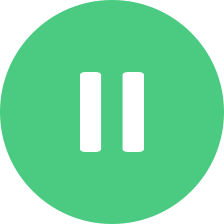

In [3]:
Image.open('/kaggle/input/my-picture/sample-6.png')

* 产生svg
* Generate SVG

In [4]:
starvector.cuda()
starvector.eval()
image_pil = Image.open('/kaggle/input/my-picture/sample-6.png')
image =starvector.process_images([image_pil])[0].cuda()
if not image.shape[0] == 1:
    image = image.squeeze(0)
batch ={"image": image,"use_flash_attn": False}

raw_svg = starvector.generate_im2svg(batch, max_length=4000)[0]
svg, raster_image = process_and_rasterize_svg(raw_svg)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


* 查看结果
* view the result

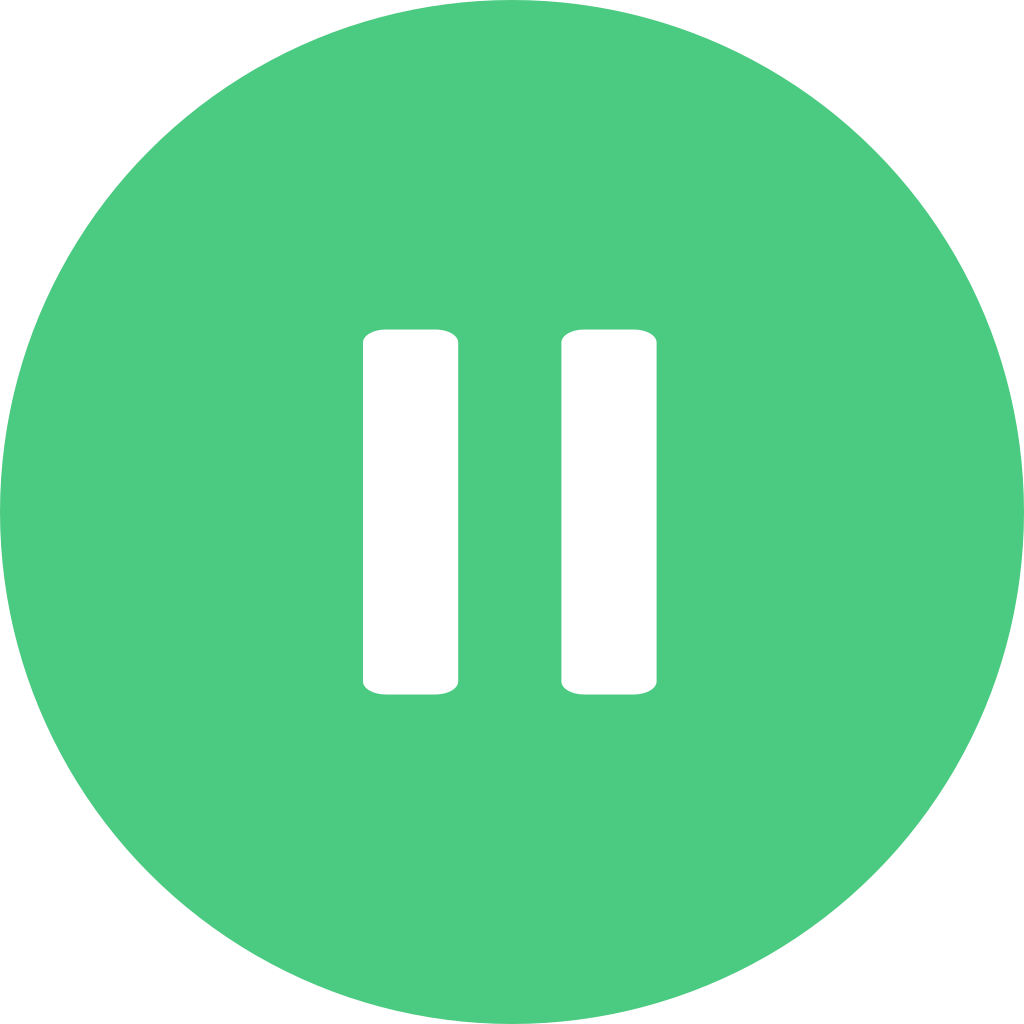

In [5]:
from IPython.display import SVG
SVG(svg)